## Importando librerías

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2021-11-11 17:06:15.928934: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## Cargando dataset de Fashion MNIST

In [2]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

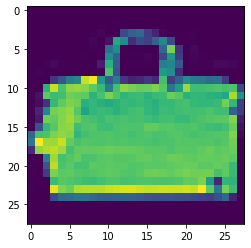

In [4]:
plt.imshow(train_images[99])

## Limpieza de datos

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


## Creando nuestra red neuronal

In [6]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

2021-11-11 17:06:22.508038: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-11 17:06:22.511335: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-11 17:06:22.556613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 17:06:22.557227: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-11-11 17:06:22.557276: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-11 17:06:22.581827: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

## Compilando la red neuronal

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

## Entenando la red

In [8]:
model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10)

2021-11-11 17:06:24.797704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-11 17:06:24.808094: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000185000 Hz


Epoch 1/10


2021-11-11 17:06:25.496465: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-11-11 17:06:26.270917: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-11-11 17:06:26.285180: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


938/938 [==============================] - 10s 4ms/step - loss: 0.7914 - accuracy: 0.7080
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4090 - accuracy: 0.8511
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3552 - accuracy: 0.8743
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3358 - accuracy: 0.8796
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3194 - accuracy: 0.8849
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3141 - accuracy: 0.8892
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3080 - accuracy: 0.8915
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3070 - accuracy: 0.8927
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3104 - accuracy: 0.8923
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3058 - accuracy: 0.8926


## Análisis de resultados

In [9]:
score = model.evaluate(test_images, test_labels, verbose=0)


In [10]:
score

[0.2863689064979553, 0.8980000019073486]

## Callbacks

In [11]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=1)
model.fit(train_images,
         train_labels,
         batch_size=64,
        callbacks=[early],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3137 - accuracy: 0.8911
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3131 - accuracy: 0.8908


In [12]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                verbose=1,
                                  monitor='accuracy',
                                  save_best_only=True)
model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks=[checkpoint],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3175 - accuracy: 0.8917

Epoch 00001: accuracy improved from -inf to 0.89168, saving model to mi_primer_red_conv.hdf5
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3163 - accuracy: 0.8908

Epoch 00002: accuracy did not improve from 0.89168
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3200 - accuracy: 0.8911

Epoch 00003: accuracy did not improve from 0.89168
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3198 - accuracy: 0.8906

Epoch 00004: accuracy did not improve from 0.89168
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3234 - accuracy: 0.8889

Epoch 00005: accuracy did not improve from 0.89168
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3204 - accuracy: 0.8898

Epoch 00006: accuracy did not improve from 0.89168
Epoch 7/10
938/938 [==========================

In [13]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')

In [14]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.8723


[0.6963484287261963, 0.8723000288009644]